### Solving Atrapalhando Fugitivos using Simulated Annealing

In [179]:
using DataStructures
using Random

## Dijkstra

Directed Graph is represented as adjacency matrix:  
g[0,1] = -1 -> no edge from 0 to 1  
g[0,1] = v -> edge with weight v from 0 to 1  

In [182]:
n = 2
num_vertices = n^2

graph = fill(-1, (num_vertices, num_vertices))

graph[1, 2] = 3
graph[1, 3] = 10
graph[1, 4] = 8

graph[2, 3] = 1
graph[2, 4] = 10

display(graph)

4×4 Matrix{Int64}:
 -1   3  10   8
 -1  -1   1  10
 -1  -1  -1  -1
 -1  -1  -1  -1

In [184]:
function addr(i, j, n)
    return (i-1) * n + j
end

const INT_MAX = typemax(Int64)

# Dijkstra for adjecency matrix
function dijkstra(g, s)
    # Initialization
    dist = fill(INT_MAX, num_vertices)
    visited = fill(false, num_vertices)
    dist[s] = 0 

    # Generating Q arrays as min-heap
    Q = PriorityQueue{Int64, Int64}()
    Q[s] = dist[s]

    # Main loop
    while !isempty(Q)
        u, du = peek(Q)
        dequeue!(Q)
        if !visited[u]
            visited[u] = true
            adjacent_u = g[u, :]
            for v in 1:length(adjacent_u)
                if adjacent_u[v] > -1
                    # apply resource
                    if dist[v] > (du + adjacent_u[v])
                        dist[v] = du + adjacent_u[v]
                        Q[v] = dist[v]
                    end
                end
            end 
        end  
    end 

    return dist
end 

dijkstra (generic function with 1 method)

In [183]:
# Dijkstra for adjecency list
function dijkstra(g, s)
    # Initialization
    dist = Dict{String, Int64}()
    visited = Dict{String, Bool}()
    V = keys(g)
    for v in V
        dist[v] = INT_MAX
        visited[v] = false
    end
    dist[s] = 0

    # Generating Q arrays as min-heap
    Q = PriorityQueue{String, Int64}()
    Q[s] = dist[s]

    # Main loop
    while !isempty(Q)
        u, du = peek(Q)
        dequeue!(Q)
        if !visited[u]
            visited[u] = true
            adjacent_u = g[u]
            for v in adjacent_u
                if dist[v[1]] > (du + v[2])
                    dist[v[1]] = du + v[2]
                    Q[v[1]] = dist[v[1]]
                end
            end 
        end  
    end 

    return dist
end

graph2 = Dict{String, Array{Tuple{String, Int64}}}()
graph2["1-1"] = [("1-2", 3), ("2-1", 10), ("2-2", 8)]
graph2["1-2"] = [("2-1", 1), ("2-2", 10)]
graph2["2-1"] = []
graph2["2-2"] = []

print(graph2)

Dict{String, Array{Tuple{String, Int64}}}("1-2" => [("2-1", 1), ("2-2", 10)], "2-1" => [], "1-1" => [("1-2", 3), ("2-1", 10), ("2-2", 8)], "2-2" => [])

## Simulated Annealing

In [366]:
function calcNumResources(R)
    k = 0
    for group in R
        k += group[2]
    end
    
    return k
end

function applyResources(g, u, delta)
    neighbours_u = g[u, :]
    for v in 1:length(neighbours_u)
        if neighbours_u[v] > -1
            g[u, v] += delta
        end
    end
end

function numReachableVertices(g, start, t_max)
    # get current solution and calc distanes with sol
    # copy g
    distances = dijkstra(g, start)
    numVertices = 0
    for d in distances
        if d <= t_max
            numVertices += 1
        end
    end
    
    return numVertices
end

function generateNextSolution(S, num_vertices)
    n = length(S)
    index = rand(1:n)
    S_next = copy(S)

    random_vertex = rand(1:num_vertices)
    while random_vertex == S[index]
        random_vertex = rand(1:num_vertices)
    end

    S_next[index] = random_vertex

    return S'
end

generateNextSolution (generic function with 1 method)

In [363]:
n = 4
delta_t = 5
t_max = 20
R = [(5, 2), (10, 2)]
k = calcNumResources(R)
num_vertices = n^2

# Generating random initial solution
Random.seed!(11235813)
S = randperm(num_vertices)[1:k]

4-element Vector{Int64}:
 13
  6
 12
  7

In [364]:
graph = fill(-1, (num_vertices, num_vertices))
graph[1, 2] = 2
graph[1, 5] = 1
graph[2, 3] = 1
graph[2, 6] = 2
graph[3, 4] = 1
graph[3, 7] = 1
graph[4, 8] = 3
graph[5, 6] = 2
graph[5, 9] = 3
graph[6, 10] = 1
graph[7, 11] = 3
graph[8, 12] = 1
graph[9, 13] = 1
graph[10, 11] = 2
graph[12, 16] = 2
graph[13, 14] = 5
graph[14, 15] = 1
graph[15, 16] = 1

display(graph)

16×16 Matrix{Int64}:
 -1   2  -1  -1   1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
 -1  -1   1  -1  -1   2  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
 -1  -1  -1   1  -1  -1   1  -1  -1  -1  -1  -1  -1  -1  -1  -1
 -1  -1  -1  -1  -1  -1  -1   3  -1  -1  -1  -1  -1  -1  -1  -1
 -1  -1  -1  -1  -1   2  -1  -1   3  -1  -1  -1  -1  -1  -1  -1
 -1  -1  -1  -1  -1  -1  -1  -1  -1   1  -1  -1  -1  -1  -1  -1
 -1  -1  -1  -1  -1  -1  -1  -1  -1  -1   3  -1  -1  -1  -1  -1
 -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1   1  -1  -1  -1  -1
 -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1   1  -1  -1  -1
 -1  -1  -1  -1  -1  -1  -1  -1  -1  -1   2  -1  -1  -1  -1  -1
 -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
 -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1   2
 -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1   5  -1  -1
 -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1   1  -1
 -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1   1
 -1  -1  -1  -1  -1

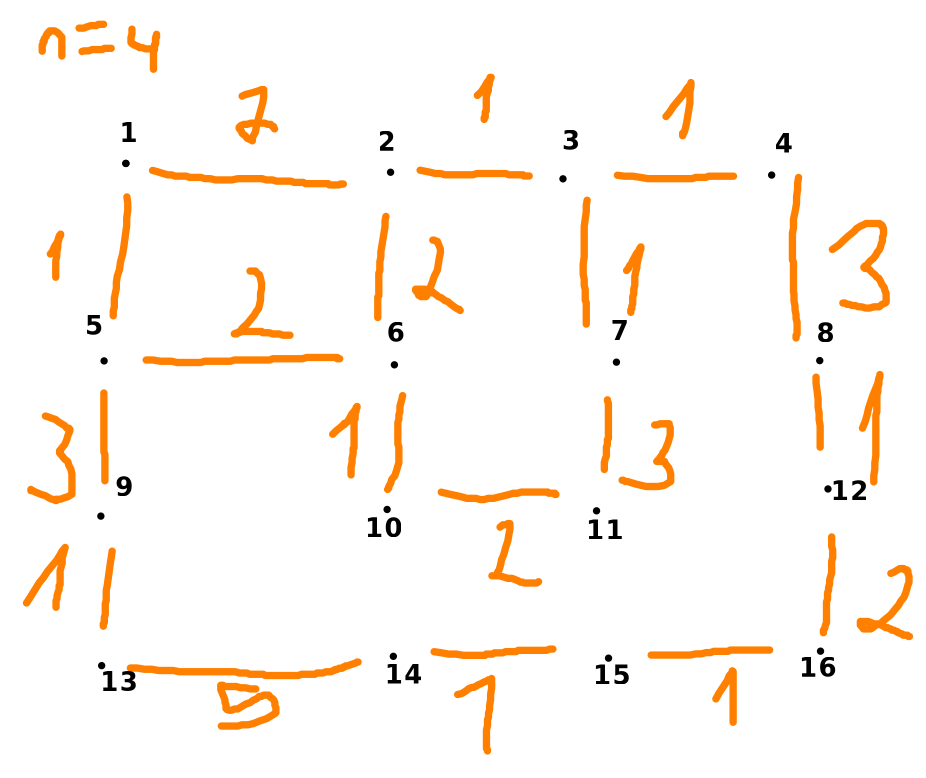

In [365]:
numReachableVertices(graph, 1, 10)

15

In [207]:
function simulatedAnnealing(S, T, Tf, r, I)
    S_best = copy(S)
    while T > Tf
        for _ in 1:I
            # apply res S_best
            #F = numReachableVertices(graph_best, start, t_max)
            S_next = generateNextSolution(S, num_vertices)
            # apply res S_new
            #F_new = 
            delta_e = F_new - F
            if delta_e <= 0
                S_best = copy(S_next)
            else
                if rand() < min(exp(-delta_e/T), 1.0)
                    S_best = copy(S_next)
                end
            end
        end
        T *= r
    end
    
    return S_best 
end

simulatedAnnealing (generic function with 1 method)

In [361]:
rand() * (1.0 - 0.0) + 0.0

0.3194328200286024